### Import Required libraries

In [1]:
import psycopg2
import pandas as pd
import psycopg2.extras
import pandas.io.sql as sqlio

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [46]:
pip install seaborn

  Using cached scipy-1.8.0-cp39-cp39-win_amd64.whl (36.9 MB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\hp\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


## DataBase Connection

In [4]:
class PostgresConnection(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "afra1234",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("successfully connected to database")
        return self.connection

In [5]:
con = PostgresConnection().getConnection()

successfully connected to database


In [6]:
conn = psycopg2.connect(database="ecomdb",
                                           user = "postgres",
                                           password = "afra1234",
                                           host = "127.0.0.1",
                                           port = "5432")
print("successfully connected to database")

successfully connected to database


## Simple CUBE query

### Q1: Find the division/district/year/month wise total_sale_price joining fact table and respective dimension table

***Total_sale_price By Division Wise***

In [6]:
cur = con.cursor()
select_stmt = "SELECT  s.division, t.item_key, SUM(t.total_price) FROM ecom_schema.fact_table t JOIN ecom_schema.store_dim s on s.store_key = t.store_key GROUP BY CUBE(s.division, t.item_key) ORDER BY s.division ASC"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['division', 'item_key', 'total_sales_price'])
df.head(10)

,division,item_key,total_sales_price
0,BARISAL,I00095,24880.0
1,BARISAL,I00173,30096.0
2,BARISAL,I00006,25480.00
3,BARISAL,I00223,22396.5
4,BARISAL,I00043,41472.0
5,BARISAL,I00088,28611.0
6,BARISAL,I00250,29425.5
7,BARISAL,I00110,37462.5
8,BARISAL,I00199,26670.0
9,BARISAL,I00139,35328.0


In [7]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  s.division, SUM(t.total_price) " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "GROUP BY CUBE(s.division)" \
        "ORDER BY s.division ASC"
cur.execute(select_stmt)
records = cur.fetchall()
records


successfully connected to database


[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [8]:
df = pd.DataFrame(list(records), columns=['Division', 'Total_sales'])
df

,Division,Total_sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25
7,None,105401435.75


In [9]:
df.drop([7],axis=0,inplace=True)

In [10]:
df

,Division,Total_sales
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [11]:
df.dtypes

Division       object
Total_sales    object
dtype: object

In [12]:
df['Total_sales'] = df['Total_sales'].astype('float64')

In [13]:
df.dtypes

Division        object
Total_sales    float64
dtype: object

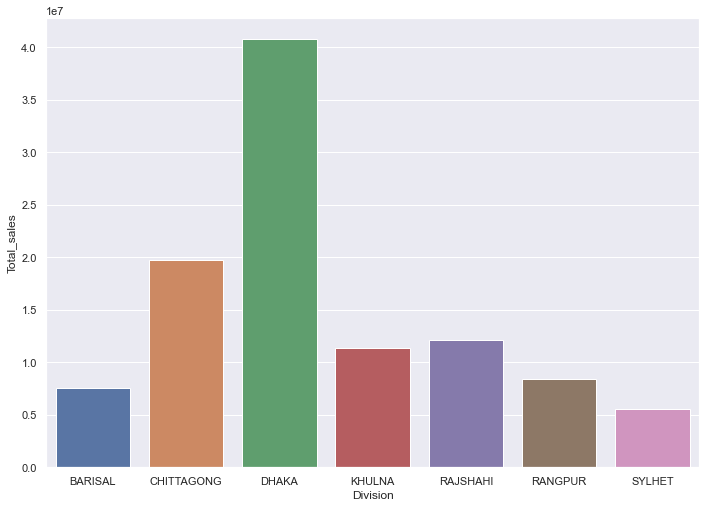

In [18]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="Division", y="Total_sales", data=df)

In [19]:
df = df.set_index(['Division'])

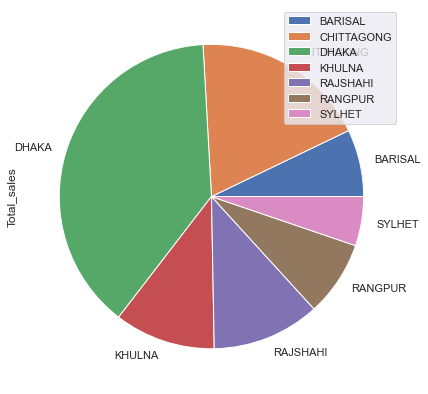

In [24]:
plot = df.plot.pie(y='Total_sales', figsize=(7, 7))

***Total_sale_price By District Wise***

In [109]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  s.district, t.item_key, SUM(t.total_price) " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "GROUP BY CUBE(s.district, t.item_key)" \
        "ORDER BY s.district ASC"  # Ascending order
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('BAGERHAT', 'I00001', Decimal('2863.5')),
 ('BAGERHAT', 'I00002', Decimal('1559.25')),
 ('BAGERHAT', 'I00003', Decimal('2362.50')),
 ('BAGERHAT', 'I00004', Decimal('2038.50')),
 ('BAGERHAT', 'I00005', Decimal('2058.75')),
 ('BAGERHAT', 'I00006', Decimal('4371.25')),
 ('BAGERHAT', 'I00007', Decimal('1707.75')),
 ('BAGERHAT', 'I00008', Decimal('5248.75')),
 ('BAGERHAT', 'I00009', Decimal('4598.75')),
 ('BAGERHAT', 'I00010', Decimal('2396.25')),
 ('BAGERHAT', 'I00011', Decimal('1626.75')),
 ('BAGERHAT', 'I00012', Decimal('5963.75')),
 ('BAGERHAT', 'I00013', Decimal('1586.25')),
 ('BAGERHAT', 'I00014', Decimal('1991.25')),
 ('BAGERHAT', 'I00015', Decimal('1451.25')),
 ('BAGERHAT', 'I00016', Decimal('4663.75')),
 ('BAGERHAT', 'I00017', Decimal('1640.25')),
 ('BAGERHAT', 'I00018', Decimal('2112.75')),
 ('BAGERHAT', 'I00019', Decimal('1822.50')),
 ('BAGERHAT', 'I00020', Decimal('2004.75')),
 ('BAGERHAT', 'I00021', Decimal('1660.50')),
 ('BAGERHAT', 'I00022', Decimal('2811.25')),
 ('BAGERHAT

In [110]:
df = pd.DataFrame(list(records), columns=['District', 'item_key', 'total_sales_price'])
df

,District,item_key,total_sales_price
0,BAGERHAT,I00001,2863.5
1,BAGERHAT,I00002,1559.25
2,BAGERHAT,I00003,2362.50
3,BAGERHAT,I00004,2038.50
4,BAGERHAT,I00005,2058.75
...,...,...,...
17220,None,I00261,746064.0
17221,None,I00173,413079.0
17222,None,I00209,306280.0
17223,None,I00242,267492.0


#### Checking null Values

In [111]:
df_null=df[df["District"].isnull() | df["item_key"].isnull()]
df_null

,District,item_key,total_sales_price
264,BAGERHAT,None,1307651.00
529,BANDARBAN,None,995360.75
794,BARGUNA,None,869041.00
1059,BARISAL,None,2897237.75
1324,BHOLA,None,1012205.75
...,...,...,...
17220,None,I00261,746064.0
17221,None,I00173,413079.0
17222,None,I00209,306280.0
17223,None,I00242,267492.0


In [112]:
df= df.dropna()
df

,District,item_key,total_sales_price
0,BAGERHAT,I00001,2863.5
1,BAGERHAT,I00002,1559.25
2,BAGERHAT,I00003,2362.50
3,BAGERHAT,I00004,2038.50
4,BAGERHAT,I00005,2058.75
...,...,...,...
16954,THAKURGAON,I00260,2565.0
16955,THAKURGAON,I00261,6402.0
16956,THAKURGAON,I00262,2604.0
16957,THAKURGAON,I00263,2898.0


In [67]:
grouped = df.groupby(['District','item_key']).agg({'total_sales_price' : 'max'})
grouped

total_sales_price
District   item_key                  
BAGERHAT   I00001              2863.5
           I00002             1559.25
           I00003             2362.50
           I00004             2038.50
           I00005             2058.75
...                               ...
THAKURGAON I00260              2565.0
           I00261              6402.0
           I00262              2604.0
           I00263              2898.0
           I00264              2205.0

[16896 rows x 1 columns]

In [122]:
df_new = pd.crosstab(index=df["item_key"],columns=df["District"],values=df["total_sales_price"],aggfunc = 'max')
df_new

District,BAGERHAT,BANDARBAN,BARGUNA,BARISAL,BHOLA,BOGRA,BRAHMANBARIA,CHANDPUR,CHAPAI NABABGANJ,CHITTAGONG,...,RANGAMATI,RANGPUR,SATKHIRA,SHARIATPUR,SHERPUR,SIRAJGANJ,SUNAMGANJ,SYLHET,TANGAIL,THAKURGAON
item_key,,,,,,,,,,,,,,,,,,,,,
I00001,2863.5,1886.0,2357.5,7705.0,2012.5,4220.5,3473.0,3795.0,2012.5,18411.5,...,3714.5,3151.0,2725.5,2242.5,1851.5,2852.0,4450.5,4163.0,4899.0,1644.5
I00002,1559.25,1856.25,1066.50,3638.25,1343.25,2436.75,1788.75,2207.25,1552.50,10530.00,...,1647.00,1451.25,2362.50,2031.75,830.25,1883.25,2632.50,2551.50,2160.00,1255.50
I00003,2362.50,1194.75,1302.75,4576.50,1890.00,2538.00,2119.50,1950.75,978.75,10118.25,...,1728.00,1451.25,1552.50,1356.75,1262.25,1498.50,1829.25,3186.00,2700.00,1053.00
I00004,2038.50,1005.75,1451.25,3773.25,1390.50,2139.75,1998.00,1815.75,978.75,10469.25,...,3010.50,1768.50,1431.00,1113.75,479.25,1809.00,2139.75,2436.75,2936.25,1134.00
I00005,2058.75,1653.75,762.75,3577.50,1424.25,2234.25,2153.25,2355.75,891.00,10165.50,...,1849.50,1410.75,1532.25,1458.00,1201.50,1512.00,2214.00,3273.75,2733.75,1458.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
I00260,3030.0,4545.0,3480.0,9240.0,3315.0,5475.0,5025.0,3135.0,2640.0,26115.0,...,3660.0,3675.0,3630.0,2610.0,2490.0,4455.0,5070.0,6585.0,4965.0,2565.0
I00261,8745.0,8481.0,5016.0,16962.0,8250.0,14124.0,9834.0,6963.0,5280.0,55902.0,...,11319.0,10329.0,7722.0,8217.0,5643.0,9372.0,12441.0,13563.0,10824.0,6402.0
I00262,4214.0,2436.0,3514.0,8134.0,2576.0,5320.0,3486.0,2926.0,1918.0,21686.0,...,5684.0,3290.0,3444.0,2674.0,2212.0,3486.0,4382.0,6202.0,4578.0,2604.0


In [123]:
df_new.dtypes

District
BAGERHAT      object
BANDARBAN     object
BARGUNA       object
BARISAL       object
BHOLA         object
               ...  
SIRAJGANJ     object
SUNAMGANJ     object
SYLHET        object
TANGAIL       object
THAKURGAON    object
Length: 64, dtype: object

In [124]:
df_new = df_new.iloc[:20,:13].astype('float64')

<AxesSubplot:xlabel='item_key'>

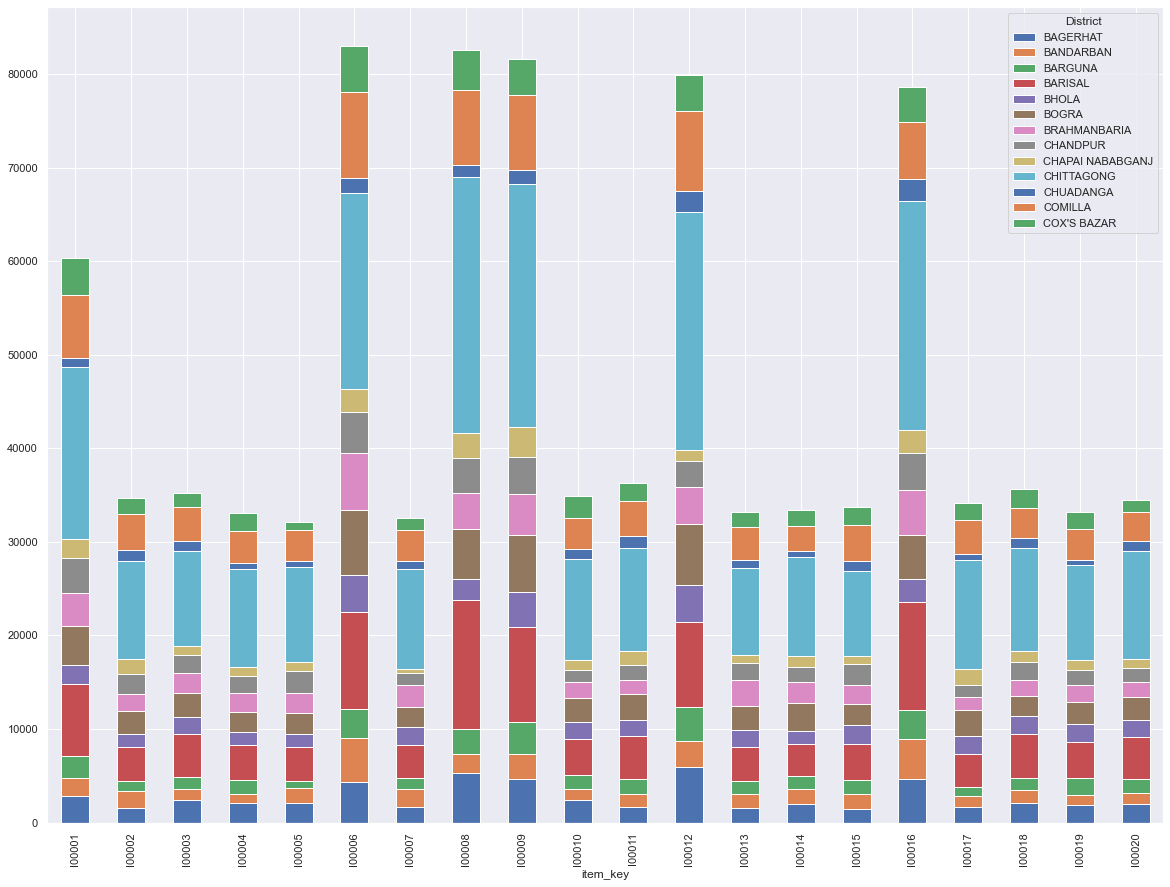

In [125]:
df_new.plot(kind="bar",figsize=(20,15),stacked=True)

### Total_sale_price By year Wise**

In [161]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  year, SUM(total_price) total_sales_price " \
        "FROM ecom_schema.time_dim " \
        "INNER JOIN ecom_schema.fact_table ON fact_table.time_key = time_dim.time_key " \
        "GROUP BY CUBE(time_dim.year)"
cur.execute(select_stmt)
records = cur.fetchall()
records 


successfully connected to database


[(None, Decimal('105401435.75')),
 (Decimal('2021'), Decimal('883772.25')),
 (Decimal('2019'), Decimal('14949510.25')),
 (Decimal('2018'), Decimal('15108197.25')),
 (Decimal('2016'), Decimal('14976508.25')),
 (Decimal('2014'), Decimal('14334731.25')),
 (Decimal('2015'), Decimal('15095720.25')),
 (Decimal('2017'), Decimal('15015806.00')),
 (Decimal('2020'), Decimal('15037190.25'))]

In [162]:
df_year = pd.DataFrame(list(records), columns=['year', 'total_sales_price'])
df_year['total_sales_price'] = df_year['total_sales_price'].astype('int64')

df_year.drop([0],axis=0,inplace=True)
df_year

,year,total_sales_price
1,2021,883772
2,2019,14949510
3,2018,15108197
4,2016,14976508
5,2014,14334731
6,2015,15095720
7,2017,15015806
8,2020,15037190


In [163]:
df_year.dtypes

year                 object
total_sales_price     int64
dtype: object

In [164]:
df_year['year'] = df_year['year'].astype('int64')
df_year['year']

1    2021
2    2019
3    2018
4    2016
5    2014
6    2015
7    2017
8    2020
Name: year, dtype: int64

In [168]:
df_year.sort_values(by=["year"])

,year,total_sales_price
5,2014,14334731
6,2015,15095720
4,2016,14976508
7,2017,15015806
3,2018,15108197
2,2019,14949510
8,2020,15037190
1,2021,883772


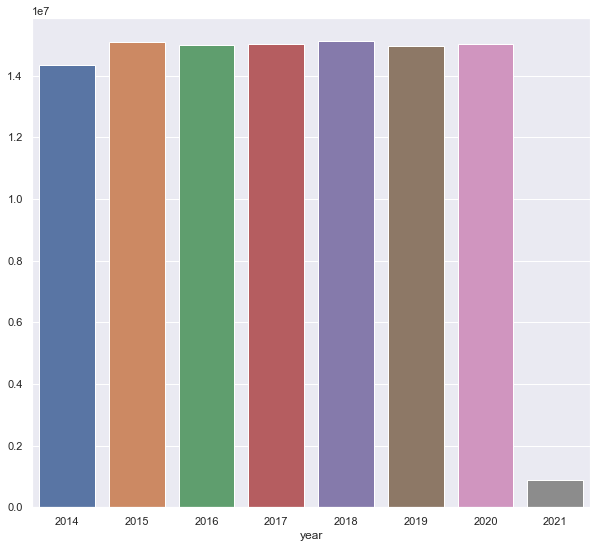

In [169]:
sns.set_theme(style="whitegrid")
x= df_year['year']
y = np.array(df_year['total_sales_price'])
sns.set(rc={'figure.figsize':(10,9)})
ax = sns.barplot(x, y, data=df_year)

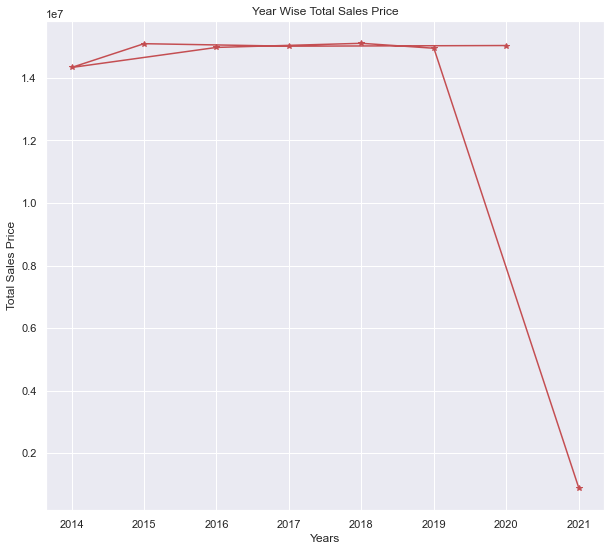

In [170]:
x= df_year['year']
y = np.array(df_year['total_sales_price'])
plt.plot(x,y, linestyle = 'solid',color = 'r', marker="*")
plt.title("Year Wise Total Sales Price")
plt.xlabel("Years")
plt.ylabel("Total Sales Price")
plt.show()

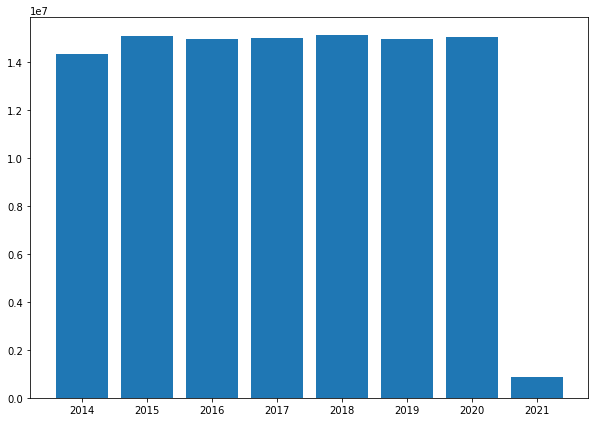

In [29]:
fig = plt.figure(figsize =(10, 7))
plt.bar(df_year["year"],df_year["total_sales_price"])
 
# Show Plot
plt.show()

### Total_sale_price By month Wise

In [137]:
con = PostgresConnection().getConnection()

cur = con.cursor()
select_stmt = "SELECT  tim.month, SUM(t.total_price) total_sales_price " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "JOIN ecom_schema.time_dim tim on tim.time_key = t.time_key " \
        "GROUP BY CUBE(tim.month)" \
        "ORDER BY tim.month;"  # Ascending order
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['months', 'total_sales_price'])
df

successfully connected to database


,months,total_sales_price
0,1,9042244.00
1,2,8073877.50
2,3,8939152.00
3,4,8504634.75
4,5,9078002.50
5,6,8556853.00
6,7,9046580.00
7,8,8929475.25
8,9,8724326.50
9,10,8902783.75


In [138]:
df.drop([12],axis=0,inplace=True)

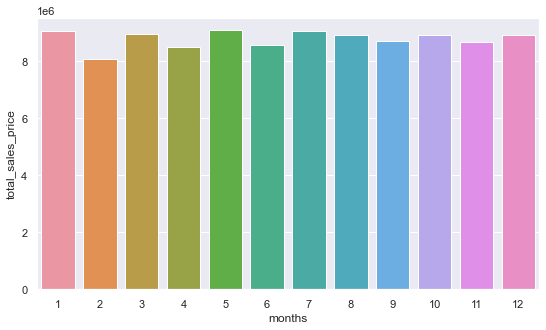

In [140]:
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(9,5)})
ax = sns.barplot(x="months", y="total_sales_price", data=df)

In [141]:
df.dtypes

months               object
total_sales_price    object
dtype: object

In [142]:
df['total_sales_price'] = df['total_sales_price'].astype('float64')

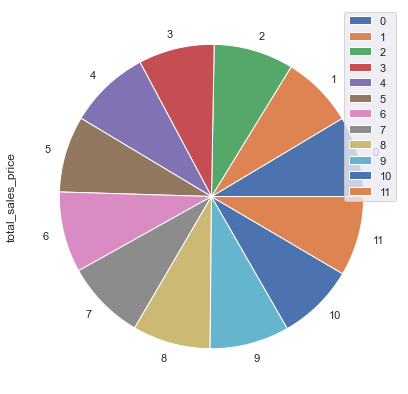

In [144]:
plot = df.plot.pie(y='total_sales_price', figsize=(7,7))

### Q2: Find the customer/bank/transaction(cash/online) wise total_sale_price joining fact table and respective dimension table 

In [172]:
con = PostgresConnection().getConnection()
cur = con.cursor()

select_stmt = "SELECT t.bank_name, sum(f.total_price) From ecom_schema.fact_table f JOIN ecom_schema.trans_dim t on t.payment_key=f.payment_key GROUP BY CUBE (t.bank_name) ORDER by sum (f.total_price)"
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('Mutual Trust Bank Limited', Decimal('2670030.50')),
 ('Mercantile Bank Limited', Decimal('2676578.50')),
 ('Pubali Bank Limited', Decimal('2682787.50')),
 ('Community Bank Bangladesh Limited', Decimal('2685751.50')),
 ('Shimanto Bank Ltd', Decimal('2685805.25')),
 ('Bank Asia Limited', Decimal('2687142.75')),
 ('Eastern Bank Limited', Decimal('2687182.25')),
 ('Midland Bank Limited', Decimal('2688430.25')),
 ('Bkash', Decimal('2689352.50')),
 ('Jamuna Bank Limited', Decimal('2689886.50')),
 ('Premier Bank Limited', Decimal('2690828.00')),
 ('Southeast Bank Limited', Decimal('2691275.75')),
 ('NRB Commercial Bank Ltd', Decimal('2692016.25')),
 ('One Bank Limited', Decimal('2692043.25')),
 ('Dutch-Bangla Bank Limited', Decimal('2692435.25')),
 ('United Commercial Bank Ltd', Decimal('2696854.75')),
 ('National Bank Limited', Decimal('2697294.25')),
 ('Prime Bank Limited', Decimal('2698896.50')),
 ('Nagad', Decimal('2699554.50')),
 ('IFIC Bank Limited', Decimal('2699759.75')),
 ('NRB Gl

In [173]:
df = pd.DataFrame(list(records), columns=['Bank_Name', 'Total_Sales_By'])
df

,Bank_Name,Total_Sales_By
0,Mutual Trust Bank Limited,2670030.50
1,Mercantile Bank Limited,2676578.50
2,Pubali Bank Limited,2682787.50
3,Community Bank Bangladesh Limited,2685751.50
4,Shimanto Bank Ltd,2685805.25
5,Bank Asia Limited,2687142.75
6,Eastern Bank Limited,2687182.25
7,Midland Bank Limited,2688430.25
8,Bkash,2689352.50
9,Jamuna Bank Limited,2689886.50


In [174]:
df.drop([39,26],axis=0,inplace=True)

In [175]:
df

,Bank_Name,Total_Sales_By
0,Mutual Trust Bank Limited,2670030.50
1,Mercantile Bank Limited,2676578.50
2,Pubali Bank Limited,2682787.50
3,Community Bank Bangladesh Limited,2685751.50
4,Shimanto Bank Ltd,2685805.25
5,Bank Asia Limited,2687142.75
6,Eastern Bank Limited,2687182.25
7,Midland Bank Limited,2688430.25
8,Bkash,2689352.50
9,Jamuna Bank Limited,2689886.50


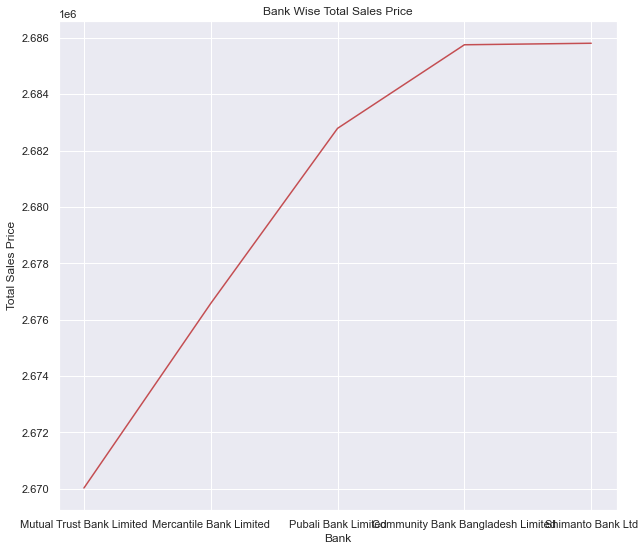

In [178]:
x= df['Bank_Name'][:5]
y = np.array(df['Total_Sales_By'][:5])
plt.plot(x,y, linestyle = 'solid',color = 'r')
plt.title("Bank Wise Total Sales Price")
plt.xlabel("Bank")
plt.ylabel("Total Sales Price")
plt.show()

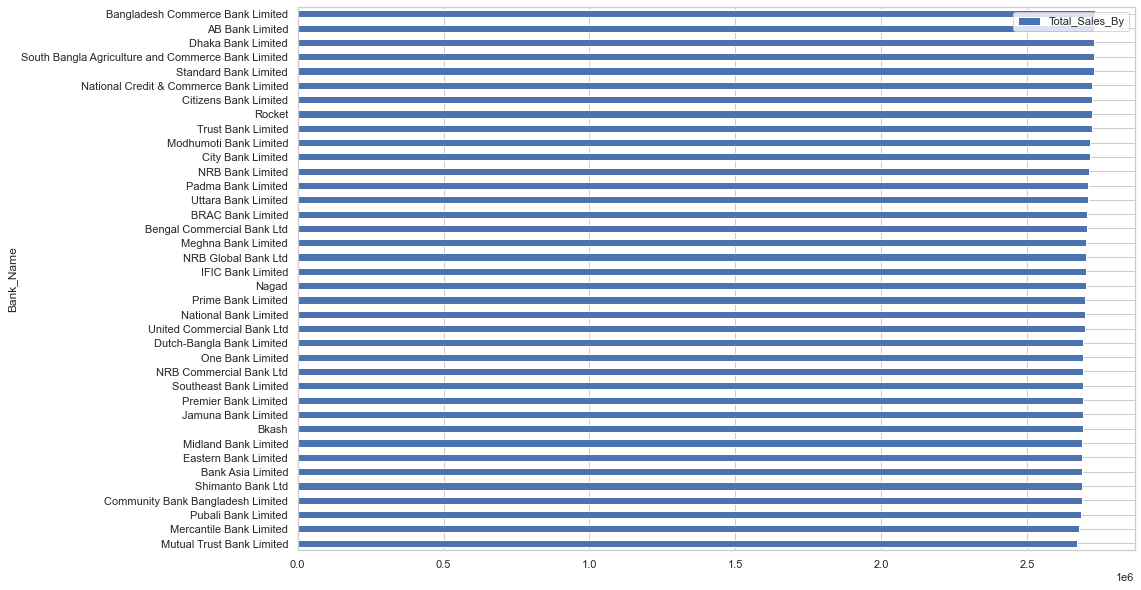

In [81]:
df['Total_Sales_By'] = df['Total_Sales_By'].astype('float64')
fig = df.plot.barh(x='Bank_Name', y='Total_Sales_By', figsize=(15,10), rot=0)

### Mobile Banking

In [186]:
df_mbank = df[(df["Bank_Name"].isin(["Bkash","Nagad","Rocket"]))]
df_mbank

,Bank_Name,Total_Sales_By
8,Bkash,2689352.50
18,Nagad,2699554.50
31,Rocket,2720974.50


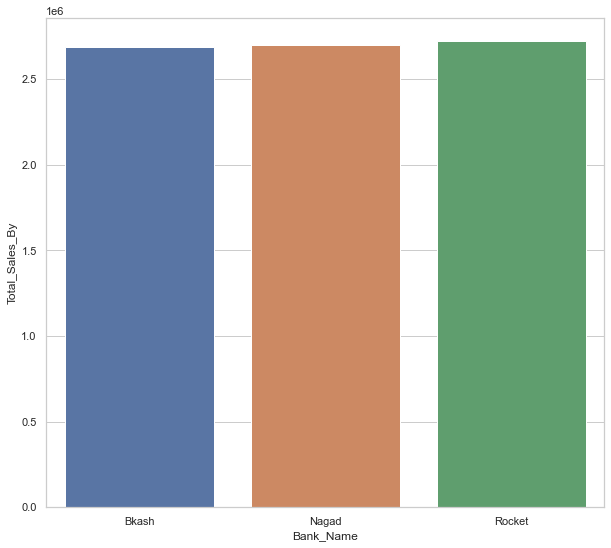

In [187]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Bank_Name", y="Total_Sales_By", data=df_mbank)

### Q3: Total sales in Barisal

In [31]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.district, SUM(t.total_price) Total_Sales " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "WHERE s.district = 'BARISAL' " \
        "GROUP BY CUBE (s.district)"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['month', 'total_sales_price'])
df.head(10)

successfully connected to database


,month,total_sales_price
0,BARISAL,2897237.75
1,None,2897237.75


### Q4: Total sales in 2015

In [32]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tim.year, SUM(t.total_price) Total_Sales " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.time_dim tim ON t.time_key = tim.time_key " \
        "WHERE tim.year = 2015 " \
        "GROUP BY CUBE (tim.year)"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['month', 'total_sales_price'])
df.head(10)

successfully connected to database


,month,total_sales_price
0,2015,15095720.25
1,None,15095720.25


### Q5: Total sales of Barisal district in 2015 using ROLLUP

In [85]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT tim.year, s.district, SUM(t.total_price) Total_Sales " \
        "FROM ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key = t.store_key " \
        "JOIN ecom_schema.time_dim tim ON t.time_key = tim.time_key " \
        "WHERE s.district = 'BARISAL' and tim.year = 2015 " \
        "GROUP BY ROLLUP (s.district, tim.year)"
cur.execute(select_stmt)
records = cur.fetchall()
df = pd.DataFrame(list(records), columns=['year','district', 'total_sales_price'])
df.drop([1,2],axis=0,inplace=True)
df

successfully connected to database


,year,district,total_sales_price
0,2015,BARISAL,415748.75


### Q6: For each store(item supplier), what are the top three products offered that are most often purchased?

In [20]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "SELECT s.store_key, i.item_name, SUM(t.quantity) total_quantity " \
        "From ecom_schema.fact_table t " \
        "JOIN ecom_schema.store_dim s on s.store_key=t.store_key " \
        "JOIN ecom_schema.item_dim i on i.item_key=t.item_key " \
        "GROUP BY CUBE(s.store_key,i.item_name) " 
        
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', '100% Juice Box Variety 6.75 oz ', Decimal('10')),
 ('S0001', 'A&W Root Beer - 12 oz cans', Decimal('60')),
 ('S0001', 'A&W Root Beer Diet - 12 oz cans', Decimal('8')),
 ('S0001', 'Advil 2 pill packets', Decimal('28')),
 ('S0001', 'All Purpose Cleaner 409 Spray', Decimal('46')),
 ('S0001', 'Altoids Small Packs Variety', Decimal('13')),
 ('S0001', 'Apple Sauce Variety GoGO Squeeze 3.2oz', Decimal('37')),
 ('S0001', 'AquaFina Purified Drinking Water 16oz', Decimal('39')),
 ('S0001', 'Austin Cookie Cracker Variety', Decimal('10')),
 ('S0001', 'Austin Toasty Crackers w/ PBtr', Decimal('22')),
 ('S0001', 'Baked Chips Variety Mix Frito', Decimal('50')),
 ('S0001', "Barq's Root Beer - 12 oz cans", Decimal('43')),
 ('S0001', 'Belvita Hard Biscuits Blueberry', Decimal('11')),
 ('S0001', 'Belvita Hard Biscuits Cinnamon', Decimal('24')),
 ('S0001', 'Belvita Protein Oats Soft Biscuit', Decimal('50')),
 ('S0001', 'Blue Diamond Almonds Rstd, Sltd', Decimal('13')),
 ('S0001', 'Bounty Paper

In [26]:
df = pd.DataFrame(list(records), columns=['store_key', 'item_name','total_quantity'])
df= df.dropna()
df1= df.sort_values(by="total_quantity")
df1

,store_key,item_name,total_quantity
153029,S00629,Mars Chocolate Favorites,1
141532,S00589,Cliff Energy Bars Variety Pack,1
138682,S00579,Chinet Comfort Hot Cups with Lids 16oz,1
14700,S00142,Tejava Unsweetened Black Tea 16.9oz,1
3714,S00104,Gatorade Liberty Variety 20 oz,1
...,...,...,...
164496,S00669,Sprite - 12 oz cans,146
72215,S00345,Coke Classic 12 oz cans,147
98083,S00436,Coke Classic 12 oz cans,153
36496,S0022,Coke Classic 12 oz cans,155


In [23]:
df.total_quantity.max()

Decimal('167')

In [24]:
df.dtypes

store_key         object
item_name         object
total_quantity    object
dtype: object

In [14]:
grouped = df.groupby(['store_key','item_name']).agg({'total_quantity' :pd.Series.max})
grouped

total_quantity
store_key item_name                                           
S0001     100% Juice Box Variety 6.75 oz                    10
          A&W Root Beer - 12 oz cans                        60
          A&W Root Beer Diet - 12 oz cans                    8
          Advil 2 pill packets                              28
          All Purpose Cleaner 409 Spray                     46
...                                                        ...
S0099     Welch's 100% Juice Variety10 oz                   45
          Wint O Green LifeSavers Sugar Free                47
          Wonderful Pistachios (in shell)                   22
          Yoplait Original Yogurt Variety Pack              29
          Zoo Animal Cookies/Crackers                       45

[187114 rows x 1 columns]

In [ ]:
grouped = df.groupby(['store_key','item_name'])['total_quantity'].nlargest(3)
grouped

In [223]:
df["total_quantity"].nlargest(3)

187840    6000185.0
188098      46837.0
188028      45665.0
Name: total_quantity, dtype: float64

In [ ]:
def top_3(df):
    return df["total_quantity"].nlargest(3)

grouped = df.groupby(['store_key','item_name'])["total_quantity"].nlargest(3)
grouped

In [43]:
grouped.reset_index()

,store_key,item_name,total_quantity
,,,max
0,S0001,100% Juice Box Variety 6.75 oz,10
1,S0001,A&W Root Beer - 12 oz cans,60
2,S0001,A&W Root Beer Diet - 12 oz cans,8
3,S0001,Advil 2 pill packets,28
4,S0001,All Purpose Cleaner 409 Spray,46
...,...,...,...
187109,S0099,Welch's 100% Juice Variety10 oz,45
187110,S0099,Wint O Green LifeSavers Sugar Free,47
187111,S0099,Wonderful Pistachios (in shell),22


### Q7: What products have been sold through card or mobile since X days?
    input: X = 5 days
    output: [item1, item2, item3, ...........]

In [106]:
days = int(input('Enter no. of days for the query: '))
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "select  i.item_key, i.item_name,t.trans_type, tdim.dates "\
    "From ecom_schema.fact_table f "\
    "JOIN ecom_schema.trans_dim t on t.payment_key=f.payment_key "\
    "JOIN ecom_schema.item_dim i on i.item_key=f.item_key "\
    "JOIN ecom_schema.time_dim tdim on tdim.time_key = f.time_key "\
    "WHERE (t.trans_type='card' or t.trans_type='mobile') and tdim.dates > (CURRENT_DATE - integer '{}')".format(days)
cur.execute(select_stmt)
result = cur.fetchall()
result

Enter no. of days for the query: 90
successfully connected to database


[('I00002',
  'A&W Root Beer Diet - 12 oz cans',
  'card',
  datetime.datetime(2021, 12, 1, 7, 54)),
 ('I00004', 'Cherry Coke 12oz', 'card', datetime.datetime(2021, 12, 1, 5, 24)),
 ('I00005',
  'Cherry Coke Zero 12 pack',
  'mobile',
  datetime.datetime(2021, 12, 1, 5, 24)),
 ('I00005',
  'Cherry Coke Zero 12 pack',
  'card',
  datetime.datetime(2021, 12, 1, 7, 53)),
 ('I00006',
  'Coke Classic 12 oz cans',
  'mobile',
  datetime.datetime(2021, 12, 1, 18, 15)),
 ('I00008',
  'Coke Zero Sugar 12 oz cans',
  'card',
  datetime.datetime(2021, 12, 1, 18, 15)),
 ('I00008',
  'Coke Zero Sugar 12 oz cans',
  'card',
  datetime.datetime(2021, 12, 1, 7, 0)),
 ('I00009',
  'Diet Coke - 12 oz cans',
  'card',
  datetime.datetime(2021, 12, 1, 13, 14)),
 ('I00009',
  'Diet Coke - 12 oz cans',
  'card',
  datetime.datetime(2021, 12, 1, 7, 54)),
 ('I00009',
  'Diet Coke - 12 oz cans',
  'card',
  datetime.datetime(2021, 12, 1, 8, 59)),
 ('I00009',
  'Diet Coke - 12 oz cans',
  'card',
  datetime.dat

In [108]:
df = pd.DataFrame(list(result), columns=["Item_key","item_name","Transaction Through",'Date'])
df

,Item_key,item_name,Transaction Through,Date
0,I00002,A&W Root Beer Diet - 12 oz cans,card,2021-12-01 07:54:00
1,I00004,Cherry Coke 12oz,card,2021-12-01 05:24:00
2,I00005,Cherry Coke Zero 12 pack,mobile,2021-12-01 05:24:00
3,I00005,Cherry Coke Zero 12 pack,card,2021-12-01 07:53:00
4,I00006,Coke Classic 12 oz cans,mobile,2021-12-01 18:15:00
...,...,...,...,...
310,I00256,Kleenex Tissue Square Boxes 75/box,card,2021-12-01 16:21:00
311,I00256,Kleenex Tissue Square Boxes 75/box,mobile,2021-12-01 11:03:00
312,I00259,Lysol Wipes 100 ct,card,2021-12-01 17:59:00
313,I00264,Tylenol Extra Strength 2 pill packets,mobile,2021-12-01 18:15:00


## Q6:  For each store(item supplier), what are the top three products offered that are most often purchased?
    S1-> item1 -> quantity_sales
    S1-> item2 -> quantity_sales
    S1-> item3 -> quantity_sales

In [193]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "Select s.store_key, i.item_key, i.item_name, sum(f.quantity) "\
     "FROM ecom_schema.fact_table f "\
     "JOIN ecom_schema.store_dim s on s.store_key=f.store_key "\
     "JOIN ecom_schema.item_dim i on i.item_key=f.item_key "\
     "GROUP BY cube(s.store_key, i.item_name), i.item_key "\
     "ORDER BY s.store_key , sum(f.quantity) ASC "
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('S0001', 'I00081', None, Decimal('4')),
 ('S0001', 'I00081', 'Tejava Unsweetened Black Tea 16.9oz', Decimal('4')),
 ('S0001', 'I00181', "Reese's Peanutbutter Cups 2/pk", Decimal('4')),
 ('S0001', 'I00181', None, Decimal('4')),
 ('S0001', 'I00038', 'Perrier Flavors Sparkling Water 16.9oz', Decimal('5')),
 ('S0001', 'I00038', None, Decimal('5')),
 ('S0001', 'I00019', None, Decimal('6')),
 ('S0001', 'I00019', 'Fresca Peach Citrus - 12 oz cans', Decimal('6')),
 ('S0001',
  'I00251',
  'Dawn Ultra Dish Detergent, Original Scent ',
  Decimal('6')),
 ('S0001', 'I00251', None, Decimal('6')),
 ('S0001', 'I00054', 'Monster Zero Ultra 16 oz', Decimal('7')),
 ('S0001', 'I00054', None, Decimal('7')),
 ('S0001', 'I00230', 'Nabisco Classic Mix ccooki, cracker', Decimal('8')),
 ('S0001', 'I00230', None, Decimal('8')),
 ('S0001', 'I00239', None, Decimal('8')),
 ('S0001', 'I00239', 'Extra Variety Packs Sugar Free', Decimal('8')),
 ('S0001', 'I00002', 'A&W Root Beer Diet - 12 oz cans', Decimal('8')),
 

In [195]:
df = pd.DataFrame(list(records), columns=['Store_ID', "Item_key" , 'Item Name', 'Total Quantity'])
df = df.dropna()
df

,Store_ID,Item_key,Item Name,Total Quantity
1,S0001,I00081,Tejava Unsweetened Black Tea 16.9oz,4
2,S0001,I00181,Reese's Peanutbutter Cups 2/pk,4
4,S0001,I00038,Perrier Flavors Sparkling Water 16.9oz,5
7,S0001,I00019,Fresca Peach Citrus - 12 oz cans,6
8,S0001,I00251,"Dawn Ultra Dish Detergent, Original Scent",6
...,...,...,...,...
381396,S0099,I00253,ForceFlex Trash Bags 13 Gal,68
381398,S0099,I00130,Hefty Supreme Foam Bowls 12oz,73
381401,S0099,I00207,Nature Valley Sweet/Salty Almond Bars,80
381402,S0099,I00227,Keebler Cookie & Cracker Variety,82


### What season(quarter) is the worst for each product item? 

In [145]:
con = PostgresConnection().getConnection()
cur = con.cursor()
select_stmt = "WITH grouped_sales AS (SELECT quarter, item_key, SUM(quantity) AS total_quantity " \
          "FROM ecom_schema.fact_table f join ecom_schema.Time_dim t ON t.time_key = f.time_key GROUP BY item_key,quarter) " \
          "SELECT CONCAT(s.item_key, '->',s.quarter, '(',total_quantity,')') " \
          "FROM grouped_sales s JOIN (SELECT item_key, min(total_quantity) AS minq " \
          "FROM grouped_sales s GROUP BY item_key) ss ON ss.item_key = s.item_key and s.total_quantity = ss.minq " 
        
cur.execute(select_stmt)
records = cur.fetchall()
records

successfully connected to database


[('I00001->Q2(5735)',),
 ('I00002->Q4(5589)',),
 ('I00003->Q3(5606)',),
 ('I00004->Q4(5521)',),
 ('I00005->Q2(5286)',),
 ('I00006->Q2(5405)',),
 ('I00007->Q2(5329)',),
 ('I00008->Q1(5545)',),
 ('I00009->Q4(5524)',),
 ('I00010->Q4(5309)',),
 ('I00011->Q1(5463)',),
 ('I00012->Q1(5528)',),
 ('I00013->Q2(5385)',),
 ('I00014->Q3(5559)',),
 ('I00015->Q4(5929)',),
 ('I00016->Q4(5445)',),
 ('I00017->Q1(5611)',),
 ('I00018->Q1(5602)',),
 ('I00019->Q4(5424)',),
 ('I00020->Q2(5489)',),
 ('I00021->Q4(5425)',),
 ('I00022->Q1(5254)',),
 ('I00023->Q2(5869)',),
 ('I00024->Q4(5480)',),
 ('I00025->Q1(5279)',),
 ('I00026->Q2(5428)',),
 ('I00027->Q1(5351)',),
 ('I00028->Q4(5402)',),
 ('I00029->Q2(5379)',),
 ('I00030->Q3(5255)',),
 ('I00031->Q4(5569)',),
 ('I00032->Q2(5503)',),
 ('I00033->Q1(5604)',),
 ('I00034->Q3(5645)',),
 ('I00035->Q4(5120)',),
 ('I00036->Q4(5222)',),
 ('I00037->Q2(5396)',),
 ('I00038->Q2(5457)',),
 ('I00039->Q1(5472)',),
 ('I00040->Q1(5264)',),
 ('I00041->Q4(5523)',),
 ('I00042->Q1(52

In [150]:
df = pd.DataFrame(list(records), columns=['worst_season_for_each_item'])
df

,worst_season_for_each_item
0,I00001->Q2(5735)
1,I00002->Q4(5589)
2,I00003->Q3(5606)
3,I00004->Q4(5521)
4,I00005->Q2(5286)
...,...
259,I00260->Q3(5558)
260,I00261->Q2(5455)
261,I00262->Q2(5330)
262,I00263->Q1(5453)
